# Car Price Prediction

In [3]:
import pandas as pd
import numpy as np

In [4]:
car = pd.read_csv(r"C:\Users\ankus\OneDrive\Desktop\carprice\quikr_car.csv")
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [5]:
car.shape

(892, 6)

In [6]:
car.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [7]:
car['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [8]:
car['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [9]:
car['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [10]:
car['kms_driven'].unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

## QUALITY CHECK
    - Year has many non-year values
    - year type format
    - price has issue, as it has 'Ask for price'
    - kms_driven has kms included
    -kms driven has NAN values
    - keep first 3 words fo name

# Cleaning

In [11]:
## Create Backup of the original data
backup = car.copy()

In [12]:
car = car[car['year'].str.isnumeric()]

In [13]:
car['year'] = car['year'].astype(int)

In [14]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int64 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int64(1), object(5)
memory usage: 46.0+ KB


In [15]:
car =car[car['Price']!= 'Ask For Price']

In [16]:
car['Price'] = car['Price'].str.replace(',','').astype(int)

In [17]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int64 
 3   Price       819 non-null    int64 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int64(2), object(4)
memory usage: 44.8+ KB


In [18]:
car['kms_driven'] = car['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

In [19]:
car = car[car['kms_driven'].str.isnumeric()]

In [20]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int64 
 3   Price       817 non-null    int64 
 4   kms_driven  817 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int64(2), object(4)
memory usage: 44.7+ KB


In [21]:
car['kms_driven'] = car['kms_driven'].astype(int)

In [22]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int64 
 3   Price       817 non-null    int64 
 4   kms_driven  817 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.7+ KB


In [23]:
car = car[~car['fuel_type'].isna()]

In [24]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.6+ KB


In [25]:
car['name']=car['name'] = car['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [26]:
car.reset_index(drop=True   , inplace=True)

In [27]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.4+ KB


In [28]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [29]:
car=car[car['Price']<6e6].reset_index(drop=True)

In [30]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        815 non-null    object
 1   company     815 non-null    object
 2   year        815 non-null    int64 
 3   Price       815 non-null    int64 
 4   kms_driven  815 non-null    int64 
 5   fuel_type   815 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.3+ KB


In [31]:
car.describe()

,year,Price,kms_driven
count,815.000000,8.150000e+02,815.000000
mean,2012.442945,4.017933e+05,46277.096933
std,4.005079,3.815888e+05,34318.459638
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.900000e+05,56879.000000
max,2019.000000,3.100000e+06,400000.000000


In [32]:
car.to_csv(r"C:\Users\ankus\OneDrive\Desktop\carprice\cleaned_car.csv")

# Model

In [33]:
x = car.drop(columns='Price')
y= car['Price']

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import make_column_transformer 
from sklearn.pipeline import make_pipeline


In [35]:
# Select features and target
x=car.drop(columns='Price')
y=car['Price']

In [36]:
# Split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [37]:
# Apply OneHotEncoder : which converts categorical columns into numerical columns
ohe = OneHotEncoder()
ohe.fit(x[['name','company','fuel_type']])

OneHotEncoder()

In [38]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),remainder='passthrough')

In [39]:
lr = LinearRegression()

In [40]:
# Create a pipeline to include the column transformer and the model
pipe =  make_pipeline(column_trans, lr)

In [41]:
# Train the model
pipe.fit(x_train,y_train)   

c:\Users\ankus\OneDrive\Desktop\carprice\myenv\Lib\site-packages\sklearn\compose\_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [42]:
y_pred = pipe.predict(x_test)

In [43]:
mse = mean_squared_error(y_test, y_pred) 
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 31271183039.96029


In [44]:
r2 = r2_score(y_test, y_pred) 
print(f'R² Score: {r2}')

R² Score: 0.7581925138229693


In [45]:
scores=[]
for i in range(1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    pipe =  make_pipeline(column_trans, lr)
    pipe.fit(x_train,y_train)
    y_pred = pipe.predict(x_test)
    #print(f"R² Score: {r2_score(y_test, y_pred)} (random_state={i})") 
    scores.append(r2_score(y_test, y_pred))

In [46]:
np.argmax(scores)

np.int64(433)

In [47]:
scores[np.argmax(scores)]

0.8457046438151008

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=np.argmax(scores))
lr=LinearRegression()
pipe =  make_pipeline(column_trans, lr)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
scores.append(r2_score(y_test, y_pred))
r2_score(y_test, y_pred)

0.8457046438151008

In [49]:
import matplotlib.pyplot as plt 
import seaborn as sns

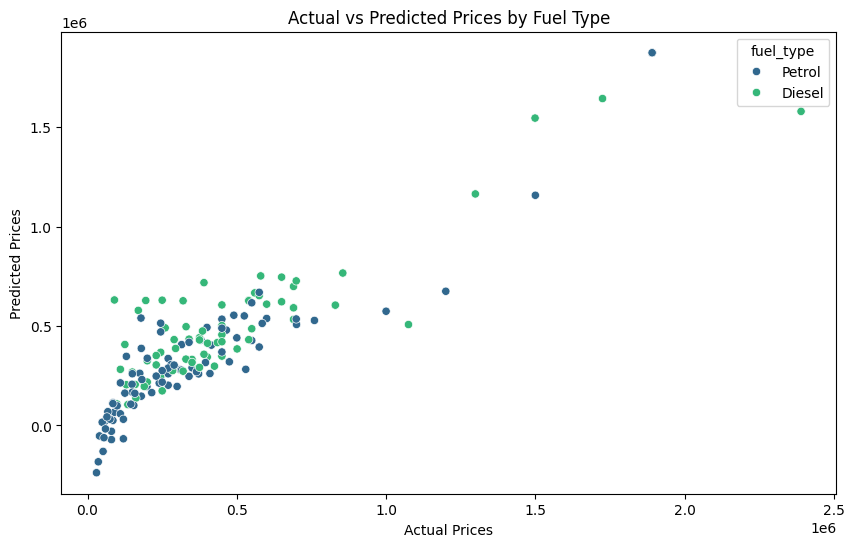

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, hue=x_test['fuel_type'], palette='viridis')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices by Fuel Type')
plt.show()

In [51]:
pipe.predict(pd.DataFrame(data=[['Maruti Suzuki Swift','Maruti',2019,'Petrol',1000]],columns=['name','company','year','fuel_type','kms_driven']))

array([458503.09121823])

In [58]:
import ipywidgets as widgets

In [ ]:


# Function to predict car price and get the actual price
def predict_car_price(name, company, year, fuel_type, kms_driven):
    input_data = pd.DataFrame({'name': [name], 'company': [company], 'year': [year], 'fuel_type': [fuel_type], 'kms_driven': [kms_driven]})
    predicted_price = pipe.predict(input_data)[0]
    actual_price = car[(car['name'] == name) & (car['company'] == company) & (car['year'] == year) & (car['fuel_type'] == fuel_type) & (car['kms_driven'] == kms_driven)]['Price']
    if not actual_price.empty:
        actual_price = actual_price.values[0]
    else:
        actual_price = "Not available"
    return int(predicted_price), actual_price

# Create widgets for input
name_widget = widgets.Dropdown(options=car['name'].unique(), description='Car Name:')
company_widget = widgets.Dropdown(options=car['company'].unique(), description='Company:')
year_widget = widgets.IntSlider(value=int(car['year'].min()), min=int(car['year'].min()), max=int(car['year'].max()), description='Year:')
fuel_type_widget = widgets.Dropdown(options=car['fuel_type'].unique(), description='Fuel Type:')
kms_driven_widget = widgets.IntText(value=0, description='Kilometers Driven:')
output_widget = widgets.Output()

# Function to update prediction
def on_button_click(b):
    with output_widget:
        output_widget.clear_output()
        name = name_widget.value
        company = company_widget.value
        year = year_widget.value
        fuel_type = fuel_type_widget.value
        kms_driven = kms_driven_widget.value
        predicted_price, actual_price = predict_car_price(name, company, year, fuel_type, kms_driven)
        print(f'Predicted Price: ₹{predicted_price}')
        print(f'Actual Price: ₹{actual_price}')

# Button widget
button = widgets.Button(description="Predict Price")
button.on_click(on_button_click)

# Display widgets
display(name_widget, company_widget, year_widget, fuel_type_widget, kms_driven_widget, button, output_widget)


Dropdown(description='Car Name:', options=('Hyundai Santro Xing', 'Mahindra Jeep CL550', 'Hyundai Grand i10', …

Dropdown(description='Company:', options=('Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota', …

IntSlider(value=1995, description='Year:', max=2019, min=1995)

Dropdown(description='Fuel Type:', options=('Petrol', 'Diesel', 'LPG'), value='Petrol')

IntText(value=0, description='Kilometers Driven:')

Button(description='Predict Price', style=ButtonStyle())

Output()